# Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

***

**Данный семинар содержит домашнее задание - оцениваемые упражнения и вопросы.**

Система оценивания: доля правильно решенных упражений. Максимальный балл, соответственно, 1.

В упражнениях оценивается два аспекта:
1. Код проходит assert'ы (если они есть)
2. Код корректен с точки зрения логики

Вопросы также оцениваются. Ответ на них нужно записывать в соответствующие markdown-ячейки.

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [2]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
AERIAL_IMG_PATH = "aerial_image.jpg"
SUNFLOWER_IMG_PATH = "sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [4]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

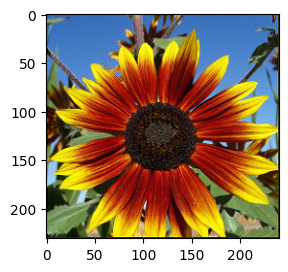

In [6]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

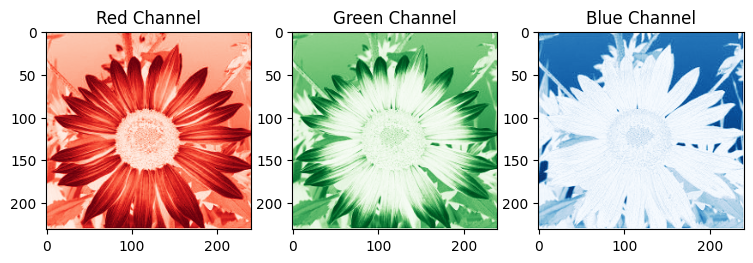

In [7]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

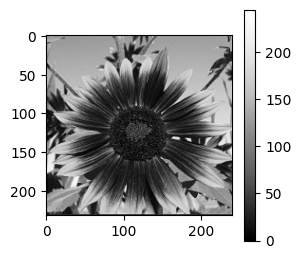

In [9]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:**
Да, можно получить черно-белое изображение (градации серого) из RGB-представления, вычисляя среднее значение интенсивностей каналов R, G и B:

$I = \frac{R + G + B}{3}$


Однако этот метод не является оптимальным по следующим причинам:

🔹 Почему усреднение не всегда правильно?

Человеческое зрение воспринимает цвета неравномерно
Глаз чувствителен к зелёному (G).
Менее чувствителен к красному (R).
Ещё менее чувствителен к синему (B).
Метод усреднения придаёт синему слишком большое значение
В результате изображение может казаться слишком тёмным или неестественным.


## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:**
Флаг cmap='Greys_r' при отображении черно-белого изображения в Matplotlib определяет, как цвета соответствуют числовым значениям пикселей. Он отличается от cmap='Greys' следующим:

🔹 Разница между Greys и Greys_r

Greys → Стандартное отображение градаций серого
🔹 Чёрный (0) → Тёмные пиксели
🔹 Белый (255) → Светлые пиксели
Greys_r → Инвертированное отображение
🔹 Чёрный (0) → Светлые пиксели
🔹 Белый (255) → Тёмные пиксели
📌 r в Greys_r означает reverse (обратный порядок цветов).



Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [10]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

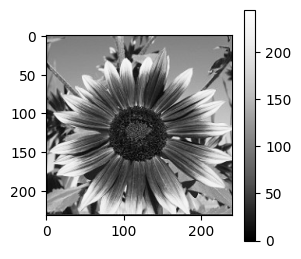

In [11]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [12]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [13]:
import numpy as np

def convert_rgb_to_grayscale(img_rgb):
    """
    Преобразует RGB-изображение в градации серого, точно соответствуя OpenCV.
    """
    weights = np.array([0.299, 0.587, 0.114])

    # Используем np.dot() и np.rint() (округление как в OpenCV)
    img_gray = np.rint(np.dot(img_rgb[..., :3], weights)).astype(np.uint8)

    return img_gray


array([[117, 112, 117, ..., 117, 124,  79],
       [121,  93,  91, ..., 111, 118,  58],
       [131,  94, 100, ..., 115, 126,  59],
       ...,
       [128,  10,  35, ..., 130, 150,  56],
       [136,   7,  17, ..., 151, 163,  74],
       [ 88,  36,  53, ...,  38,  50,  25]], dtype=uint8)
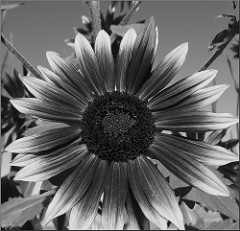

In [14]:
cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

In [15]:
diff = np.abs(cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) - convert_rgb_to_grayscale(img_rgb))
print("Максимальная разница пикселей:", np.max(diff))

Максимальная разница пикселей: 1


Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

In [16]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

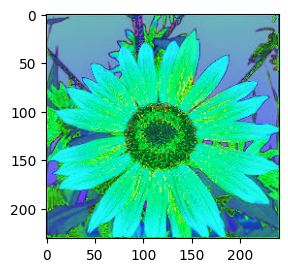

In [17]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

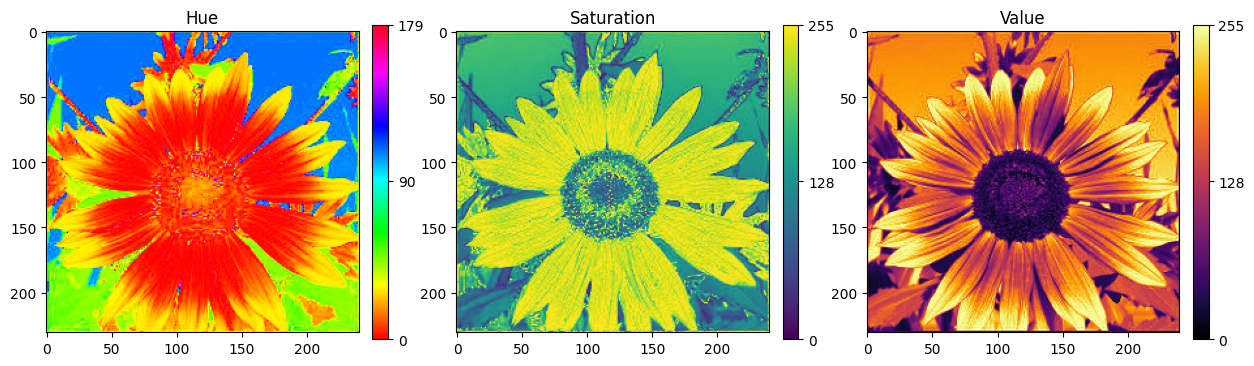

In [18]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

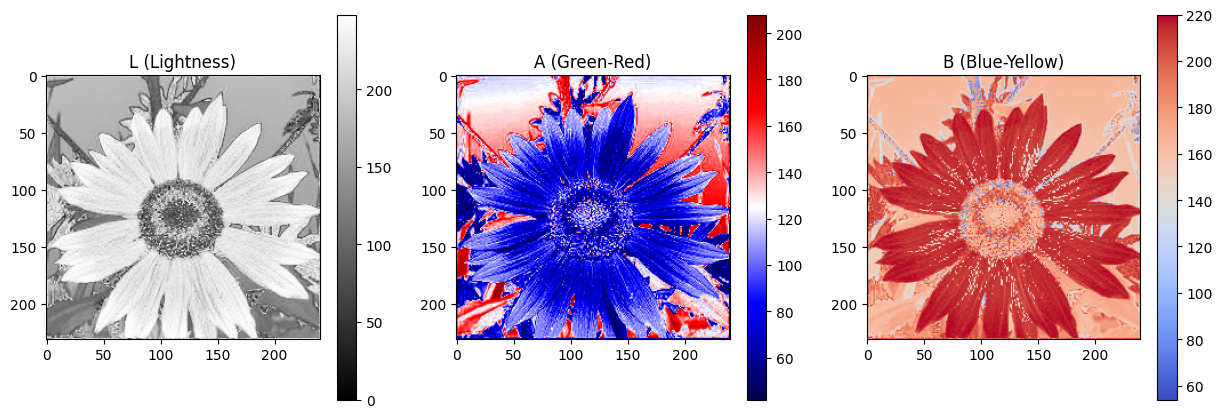

In [19]:
img_lab = cv2.cvtColor(img_hsv, cv2.COLOR_BGR2LAB)

# Разбиваем на каналы
L, A, B = cv2.split(img_lab)

# Визуализация
fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(L, cmap="gray")
axs[0].set_title("L (Lightness)")
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(A, cmap="seismic")  # Красный-зелёный канал
axs[1].set_title("A (Green-Red)")
plt.colorbar(im2, ax=axs[1])

im3 = axs[2].imshow(B, cmap="coolwarm")  # Синий-жёлтый канал
axs[2].set_title("B (Blue-Yellow)")
plt.colorbar(im3, ax=axs[2])

plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:**
🔹 HSV / HSL – удобно для поиска объектов по цвету, так как оттенок (Hue) отделён от яркости. Используется в компьютерном зрении для устранения влияния освещения.

🔹 Lab (CIE-Lab) – полезно для улучшения контраста и цветокоррекции. Яркость (L) можно корректировать независимо от цветовых каналов (A, B).

🔹 YCrCb – применяется для удаления фона, работы с оттенками кожи, а также в JPEG-сжатии, так как глаз чувствителен к яркости (Y), но не к цветовым компонентам (Cr, Cb).

🔹 Grayscale (оттенки серого) – используется для обнаружения границ, текстур и в алгоритмах распознавания лиц, где цвет не важен.

🔹 LUV / XYZ – применяются в задачах цветовой сегментации, так как основаны на физиологии человеческого восприятия.

Вывод: Выбор цветового пространства зависит от задачи – HSV для выделения цветов, Lab для контраста, YCrCb для обработки изображений, а Grayscale для анализа текстур.


# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v]
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [20]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [21]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [22]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

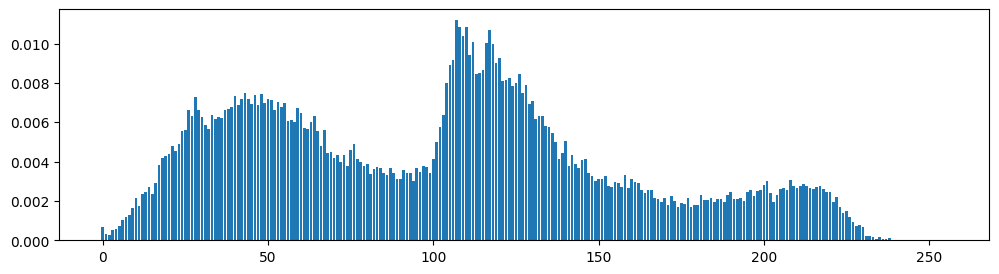

In [23]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [24]:
def compute_hist(img):
    """
    Вычисляет гистограмму изображения.

    :param img: NumPy-массив (оттенки серого или один канал RGB)
    :return: Массив длины 256, содержащий частоту каждого значения интенсивности (0-255)
    """
    hist = np.zeros(256, dtype=np.int32)  # Создаём массив для 256 уровней яркости

    # Подсчитываем количество пикселей для каждого значения интенсивности
    for pixel_value in img.flatten():
        hist[pixel_value] += 1

    return hist


In [25]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

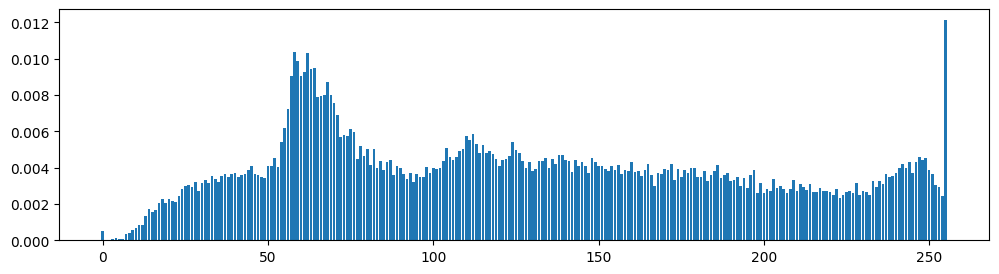

In [26]:
visualize_hist(hist_r)

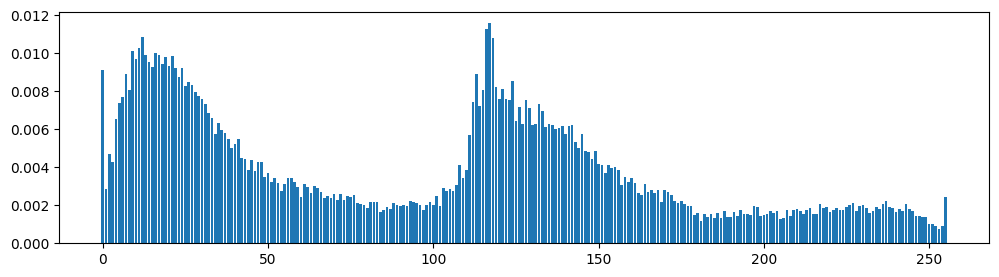

In [27]:
visualize_hist(hist_g)

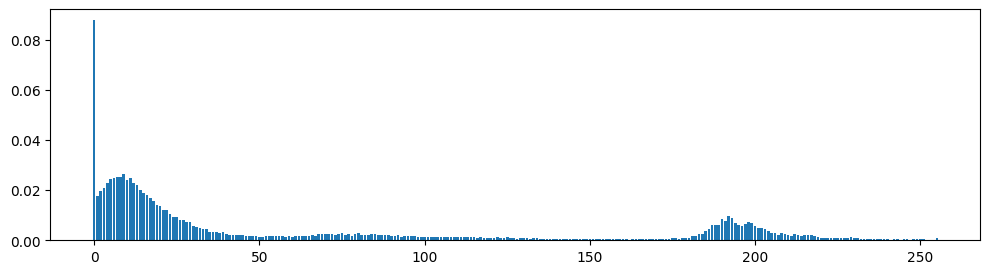

In [28]:
visualize_hist(hist_b)

In [29]:
assert((hist_gray == hist_cv).all())

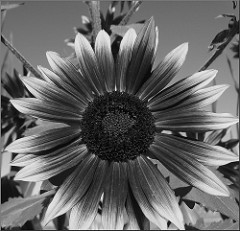

In [30]:
from google.colab.patches import cv2_imshow

cv2_imshow(img_gray)


## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:**
 Жёлтые и зелёные цвета доминировали в оригинале.
 Синего цвета практически не было.
 В изображении есть много тёмных областей.
 Гистограмма показывает большой разброс интенсивностей

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:**
Смена камеры → небольшие изменения гистограммы, особенно в деталях.
Смена освещения → смещение пиков гистограммы (светлее → вправо, темнее → влево).
Смена сцены → резкое изменение гистограммы, новые цветовые доминанты.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

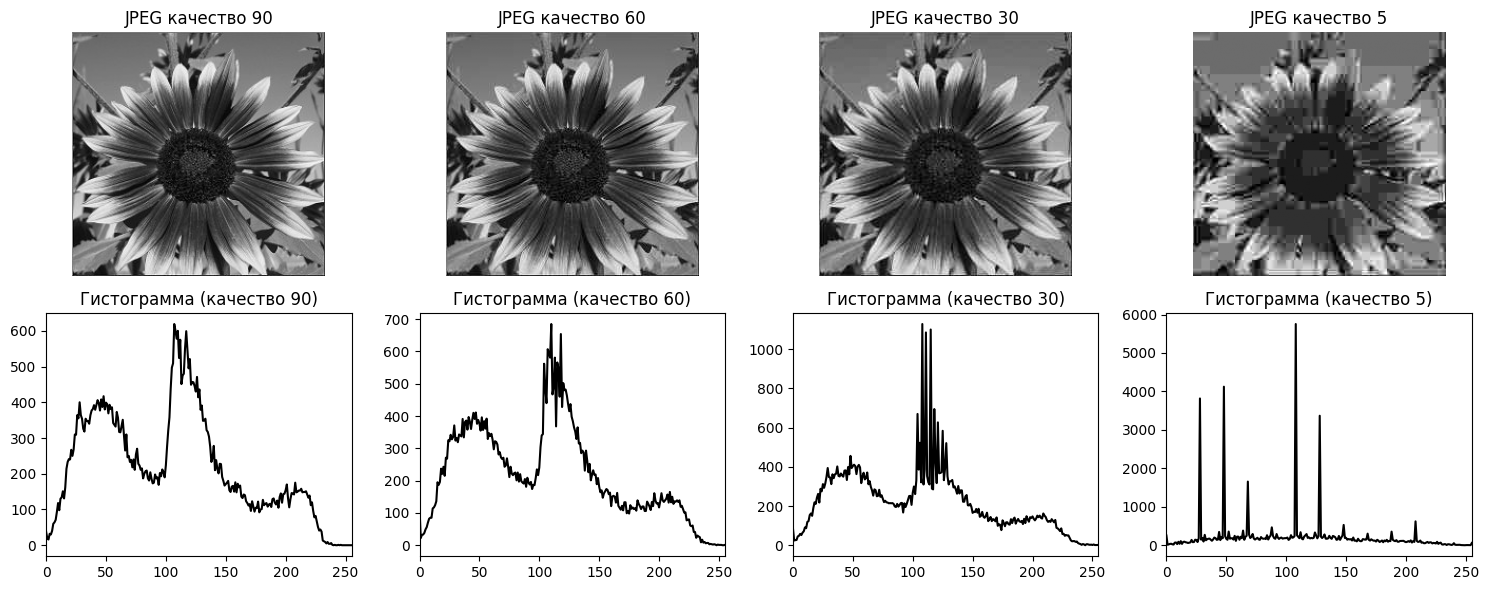

In [31]:
# Функция для сохранения и загрузки JPEG с разным качеством
def compress_and_load(img, quality):
    # Сохраняем в формате JPEG с указанным качеством
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    _, encoded_img = cv2.imencode('.jpg', img, encode_param)

    # Декодируем изображение обратно в NumPy-массив
    decoded_img = cv2.imdecode(encoded_img, cv2.IMREAD_GRAYSCALE)

    return decoded_img

# Степени сжатия JPEG
qualities = [90, 60, 30, 5]
compressed_images = [compress_and_load(img_gray, q) for q in qualities]

# Вычисляем гистограммы
histograms = [cv2.calcHist([img], [0], None, [256], [0, 256]) for img in compressed_images]

# Визуализируем изображения и их гистограммы
fig, axs = plt.subplots(2, len(qualities), figsize=(15, 6))

for i, (q, img, hist) in enumerate(zip(qualities, compressed_images, histograms)):
    axs[0, i].imshow(img, cmap="gray")  # Отображаем изображение
    axs[0, i].set_title(f"JPEG качество {q}")
    axs[0, i].axis("off")

    axs[1, i].plot(hist, color="black")  # Отображаем гистограмму
    axs[1, i].set_title(f"Гистограмма (качество {q})")
    axs[1, i].set_xlim([0, 255])

plt.tight_layout()
plt.show()


## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

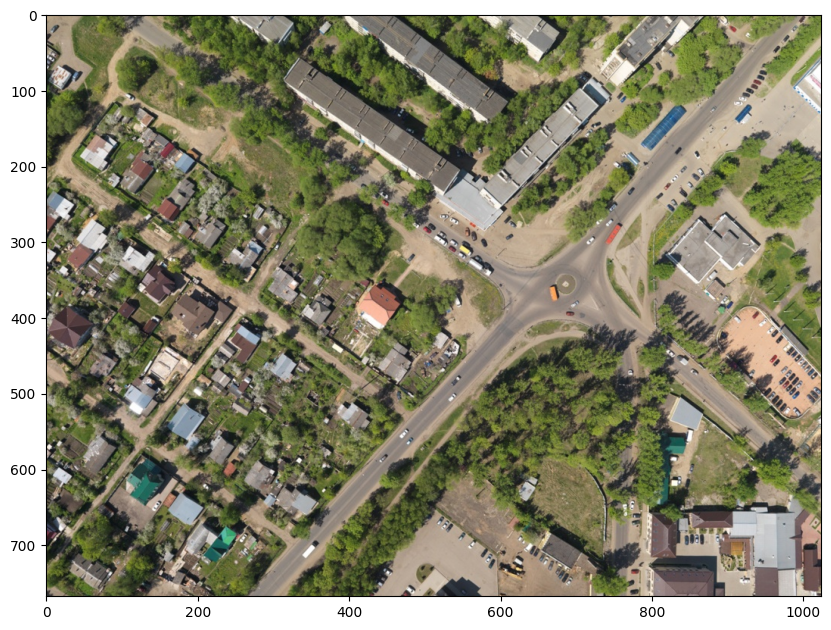

In [32]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

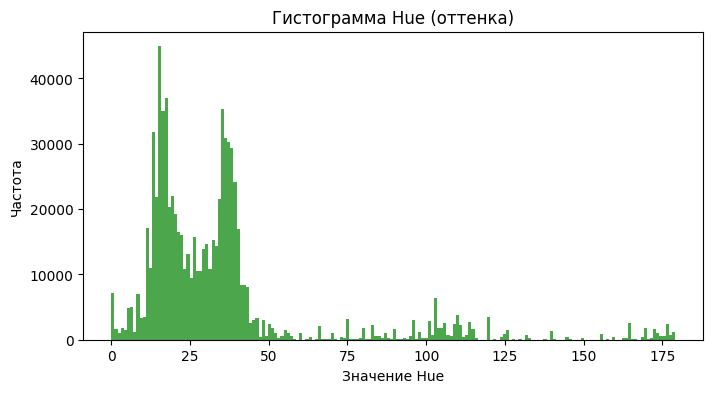

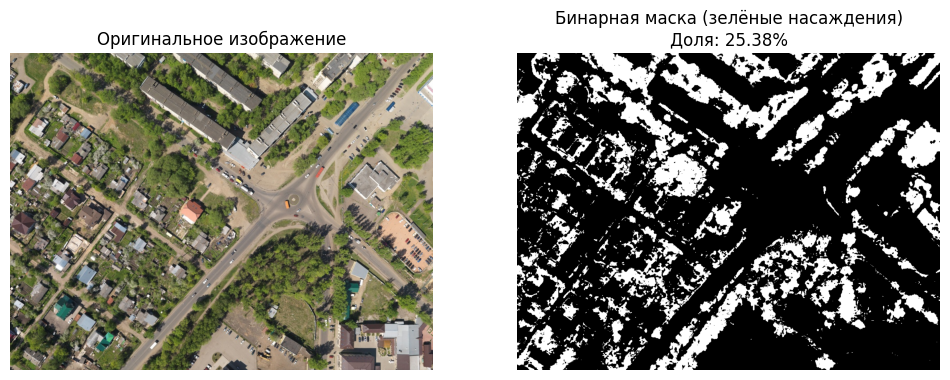

In [33]:
# Загружаем аэрофото и конвертируем в HSV
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)
hsv_image = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)

# Разбиваем на каналы HSV
h, s, v = cv2.split(hsv_image)

# Визуализируем гистограмму оттенков (Hue)
plt.figure(figsize=[8, 4])
plt.hist(h.flatten(), bins=180, color="green", alpha=0.7)  # Hue: 0-180
plt.title("Гистограмма Hue (оттенка)")
plt.xlabel("Значение Hue")
plt.ylabel("Частота")
plt.show()

# Выбираем диапазон зелёных оттенков
lower_green = np.array([35, 40, 40])  # Hue: 35-85, Saturation & Value > 40
upper_green = np.array([85, 255, 255])

# Создаём бинарную маску зелёных насаждений
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Рассчитываем процент покрытия зелёными насаждениями
green_percentage = np.sum(green_mask > 0) / green_mask.size * 100

# Визуализируем оригинальное изображение и маску
fig, axs = plt.subplots(1, 2, figsize=[12, 6])

axs[0].imshow(aerial_image)
axs[0].set_title("Оригинальное изображение")
axs[0].axis("off")

axs[1].imshow(green_mask, cmap="gray")
axs[1].set_title(f"Бинарная маска (зелёные насаждения)\nДоля: {green_percentage:.2f}%")
axs[1].axis("off")

plt.show()


# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [34]:
class IntegralImage:
    def __init__(self, img):
        assert len(img.shape) == 2, "Только для серых изображений!"
        self.img = img
        self.height, self.width = img.shape

        # Создаём интегральную матрицу с нулевой границей
        self.integral = np.zeros((self.height + 1, self.width + 1), dtype=np.int32)

        # Вычисляем интегральное изображение
        for y in range(1, self.height + 1):
            for x in range(1, self.width + 1):
                self.integral[y, x] = (
                    img[y-1, x-1]  # Текущий пиксель
                    + self.integral[y-1, x]  # Верхний пиксель
                    + self.integral[y, x-1]  # Левый пиксель
                    - self.integral[y-1, x-1]  # Вычитаем пересечение
                )

    def sum(self, x, y, w, h):
        """
        Возвращает сумму пикселей в прямоугольнике (x, y, w, h)
        """
        x1, y1 = x, y
        x2, y2 = x + w, y + h

        return (
            self.integral[y2, x2]
            - self.integral[y1, x2]
            - self.integral[y2, x1]
            + self.integral[y1, x1]
        )

In [35]:
I = IntegralImage(img_gray)

In [36]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:**
Интегральные изображения ускоряют обработку изображений – используются в распознавании лиц, фильтрации, анализе текстур.

## Вопрос 7

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:**
Метод относится к динамическому программированию, так как использует промежуточные результаты для оптимизации вычислений